In [11]:
#Project Description:
#The dataset is related to red and white variants of the Portuguese &quot;Vinho Verde&quot; wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).
#This dataset can be viewed as classification task. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods. About 12 attributes or input variables like quality, volatile acidity, pH, density, alcohol etc were provided.
#Build a classification model from the given dataset using machine learning to determine which physiochemical properties make a wine 'good'.


#Import all the necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [12]:
#Read and study the provided dataset

#Create Dataframe object

df = pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Red%20Wine/winequality-red.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [13]:
#Explore the dataset

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [14]:
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [15]:
df.shape

(1599, 12)

In [16]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [17]:
print("The dimension of the dataset:",df.shape)
print(f"\nThe column headers in the dataset: {df.columns}")

The dimension of the dataset: (1599, 12)

The column headers in the dataset: Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


it could be observed that the dataset contains 1599 rows and 12 columns out of which one is the variable / feature of interest

In [19]:
#Check the description of the dataset

df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [20]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

The dataset contains 2 different types of data (float64 and int64)

In [21]:
#Check the null (missing) values in the dataset

df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

it is observed that there were no null values in the dataset

In [22]:
#Brief about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


<Axes: >

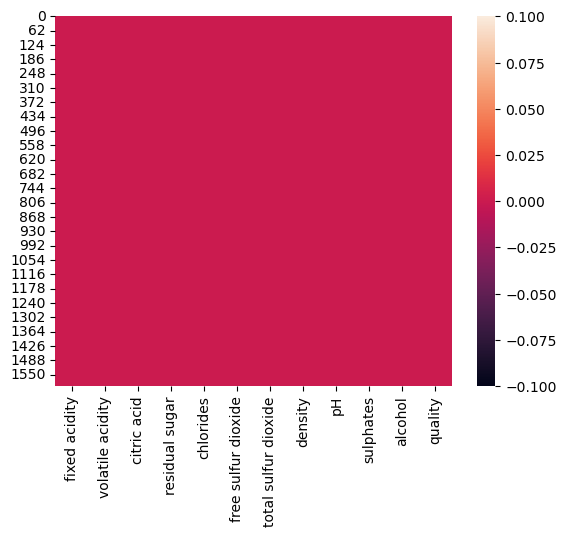

In [23]:
#Visualization using heatmap

sns.heatmap(df.isnull())

In [25]:
#Check the number of unique values in the dataset

df.nunique().to_frame("No. of unique values")

,No. of unique values
fixed acidity,96
volatile acidity,143
citric acid,80
residual sugar,91
chlorides,153
free sulfur dioxide,60
total sulfur dioxide,144
density,436
pH,89
sulphates,96


In [26]:
#this value should be checked per column as:

for i in df.columns:
    print(df[i].value_counts())
    print("\n")

fixed acidity
7.2     67
7.1     57
7.8     53
7.5     52
7.0     50
        ..
13.5     1
13.8     1
13.4     1
4.7      1
5.5      1
Name: count, Length: 96, dtype: int64


volatile acidity
0.600    47
0.500    46
0.430    43
0.590    39
0.360    38
         ..
1.035     1
0.565     1
1.130     1
1.115     1
1.090     1
Name: count, Length: 143, dtype: int64


citric acid
0.00    132
0.49     68
0.24     51
0.02     50
0.26     38
       ... 
0.72      1
0.62      1
0.75      1
1.00      1
0.78      1
Name: count, Length: 80, dtype: int64


residual sugar
2.00     156
2.20     131
1.80     129
2.10     128
1.90     117
        ... 
4.25       1
2.85       1
3.45       1
2.35       1
13.90      1
Name: count, Length: 91, dtype: int64


chlorides
0.080    66
0.074    55
0.076    51
0.078    51
0.084    49
         ..
0.108     1
0.148     1
0.143     1
0.222     1
0.230     1
Name: count, Length: 153, dtype: int64


free sulfur dioxide
6.0     138
5.0     104
10.0     79
15.0     78
12

above is the value count of all columns in the dataset

In [84]:
#Convert quality to binary classification (0 or 1) as required and drop the original quality column

x = 7

df['is_good'] = (df['quality'] >= x).astype(int)

df = df.drop('quality', axis=1)

KeyError: 'quality'

In [38]:
#Check again for the null (missing) values in the dataset

df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
is_good                 0
dtype: int64

It could be observed that quality column has been dropped and replaced with "is_good"

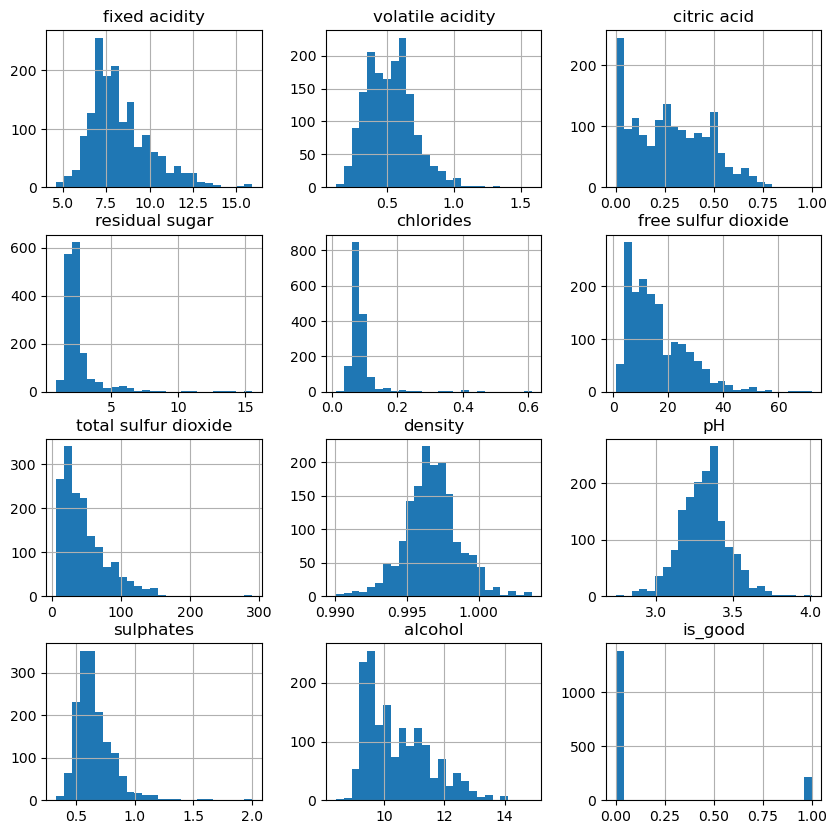

In [36]:
#Use visualization to further determine how the data is distributed on the features and display

df.hist(bins=25,figsize=(10,10))

plt.show()

Text(0, 0.5, 'alcohol')

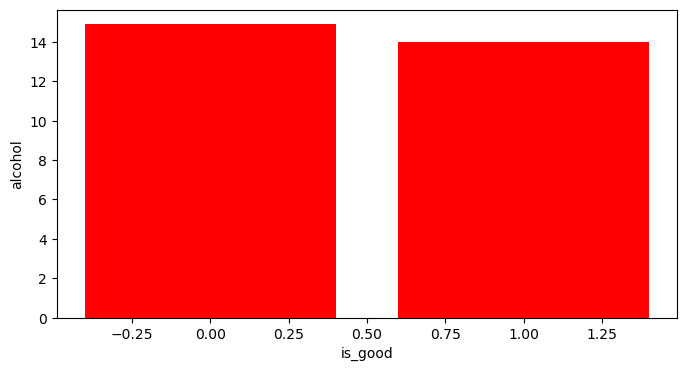

In [46]:
#Plot the bar graph to check what value of alcohol can able to make changes in "is_good" (quality).

plt.figure(figsize=[8,4])

plt.bar(df['is_good'],df['alcohol'],color='red')

plt.xlabel('is_good')  # x-axis

plt.ylabel('alcohol')  # y-axis

<Axes: >

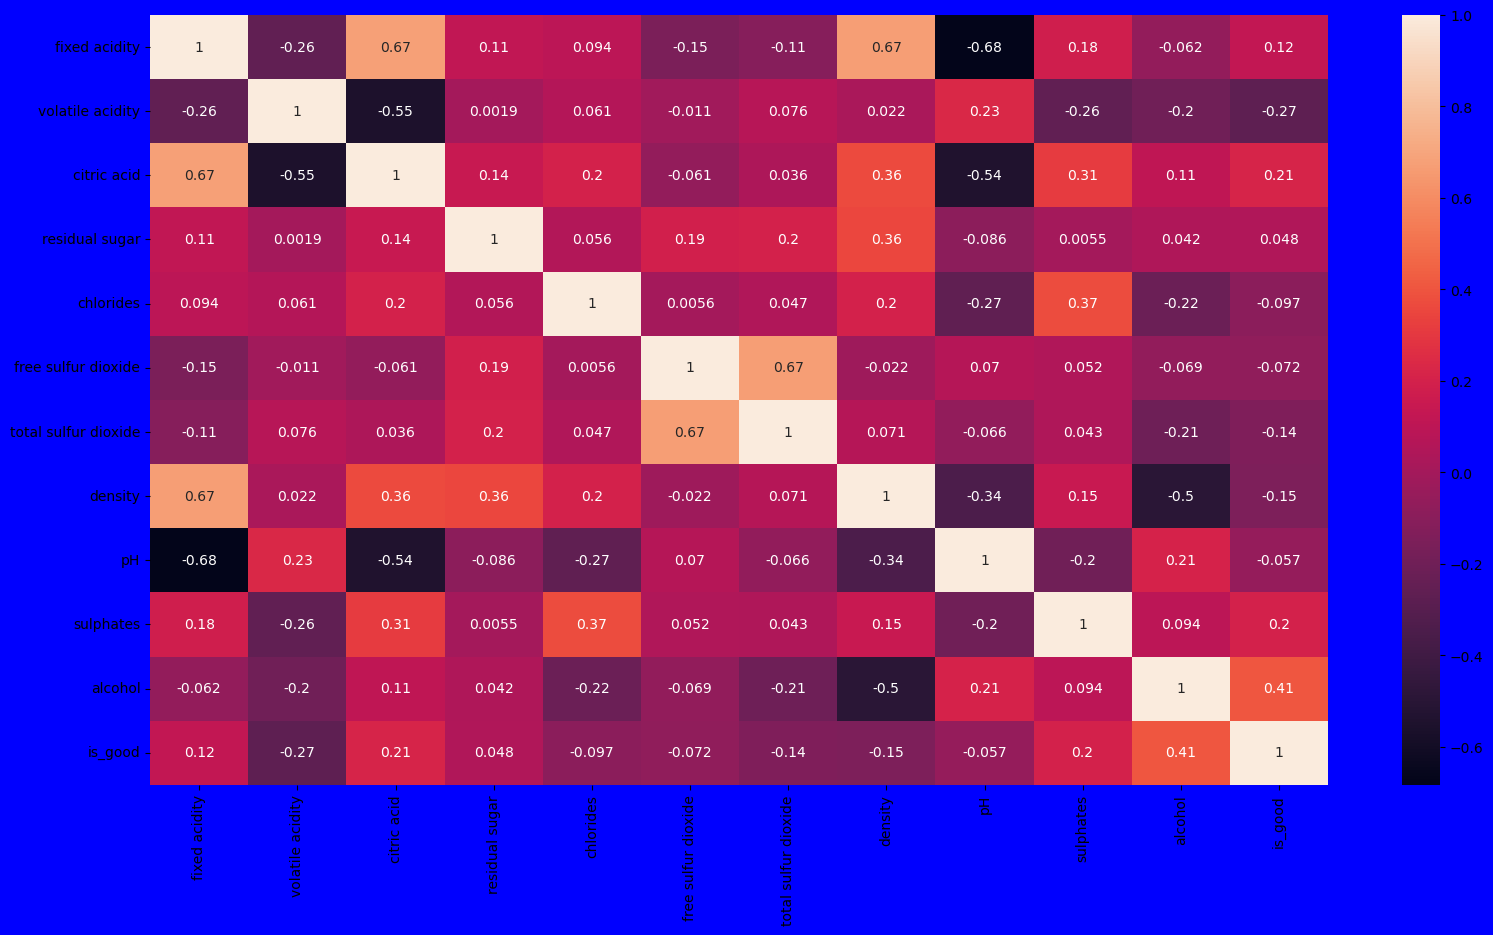

In [49]:
#Perform a correlation on the data to see nos of features that are correlated using heatmap

plt.figure(figsize=[19,10],facecolor='blue')
sns.heatmap(df.corr(),annot=True)

Correlated features affect the accuracy of the model in an equal manner. So, one of the fully correalated features has to be deleted.

To achieve this, we write a program to identify features with high correlation number greater than the set value, here 0.6. Therefore, any feature with correlation value > 0.6 is a fully correlated feature, and this amounted to citric acid, total sulfur dioxide, density and pH which satisfy the condition as printed below.

In [59]:
for a in range(len(df.corr().columns)):
    for b in range(a):
        if abs(df.corr().iloc[a,b]) >0.6:
            name = df.corr().columns[a]
            print(name)

citric acid
total sulfur dioxide
density
pH


In [64]:
#drop these features

new_df=df.drop('citric acid',axis=1)
new_df1=new_df.drop('total sulfur dioxide',axis=1)
new_df2=new_df1.drop('density',axis=1)
new_df3=new_df2.drop('pH',axis=1)

In [66]:
#Check and handle the null values in the new_df

new_df3.isnull().sum()

fixed acidity          0
volatile acidity       0
residual sugar         0
chlorides              0
free sulfur dioxide    0
sulphates              0
alcohol                0
is_good                0
dtype: int64

In [80]:
#Fill the resulting null values with fillna() fxn to sort out the numerical variables

new_df3.update(new_df3.fillna(new_df3.mean())) 

In [83]:
#To treat the categorical variables

updated_df = pd.get_dummies(new_df3,drop_first=True)
updated_df

,fixed acidity,volatile acidity,residual sugar,chlorides,free sulfur dioxide,sulphates,alcohol,is_good
0,7.4,0.700,1.9,0.076,11.0,0.56,9.4,0
1,7.8,0.880,2.6,0.098,25.0,0.68,9.8,0
2,7.8,0.760,2.3,0.092,15.0,0.65,9.8,0
3,11.2,0.280,1.9,0.075,17.0,0.58,9.8,0
4,7.4,0.700,1.9,0.076,11.0,0.56,9.4,0
...,...,...,...,...,...,...,...,...
1594,6.2,0.600,2.0,0.090,32.0,0.58,10.5,0
1595,5.9,0.550,2.2,0.062,39.0,0.76,11.2,0
1596,6.3,0.510,2.3,0.076,29.0,0.75,11.0,0
1597,5.9,0.645,2.0,0.075,32.0,0.71,10.2,0


*Model Training*:
Split the dataset into training and testing sets.
Normalize the input variables using MinMaxScaler.


In [101]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

x = df.drop('is_good', axis=1)                    #Define input (x) and output (y) variables as (from line 84 above):
y = df['is_good']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=40) #Split the dataset


norm = MinMaxScaler()                             #normalization and fitting
norm_fit = norm.fit(x_train)
new_xtrain = norm_fit.transform(x_train)
new_xtest = norm_fit.transform(x_test)

print(new_xtrain)

[[0.33628319 0.41322314 0.12       ... 0.50393701 0.33532934 0.52307692]
 [0.3539823  0.4338843  0.25       ... 0.42519685 0.16167665 0.24615385]
 [0.47787611 0.19008264 0.45       ... 0.32283465 0.05988024 0.15384615]
 ...
 [0.23893805 0.43801653 0.         ... 0.51181102 0.08383234 0.24615385]
 [0.28318584 0.33884298 0.33       ... 0.44094488 0.16167665 0.16923077]
 [0.38938053 0.39669421 0.29       ... 0.47244094 0.14371257 0.24615385]]


Train a classification model (e.g., Random Forest because it is the only ML model that gives the 88% accuracy i.e best accuracy) on the training set.

In [121]:
#Model application and data fitting

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error

rnd = RandomForestClassifier()
fit_rnd = rnd.fit(new_xtrain,y_train)
y_predict = rnd.predict(new_xtest)


#Predicting score

rnd_score = rnd.score(new_xtest,y_test)
print('The model score is : ',rnd_score)

print('***************')

print('Calculate error')

#Mean squared error
rnd_MSE = mean_squared_error(y_test,y_predict)

#Root mean squared error
rnd_RMSE = np.sqrt(rnd_MSE)

print('mean squared error is : ',rnd_MSE)
print('root mean squared error is : ',rnd_RMSE)
print(classification_report(x_predict,y_test))

The model score is :  0.909375
***************
Calculate error
mean squared error is :  0.090625
root mean squared error is :  0.3010398644698074
              precision    recall  f1-score   support

           0       1.00      0.85      0.92       320
           1       0.00      0.00      0.00         0

    accuracy                           0.85       320
   macro avg       0.50      0.42      0.46       320
weighted avg       1.00      0.85      0.92       320



In [112]:
#Differentiate the predicted value from the actual value

x_predict = list(rnd.predict(x_test))
predicted_df = {'predicted_values': x_predict, 'original_values': y_test}

pd.DataFrame(predicted_df).head(20)

,predicted_values,original_values
1035,0,1
49,0,0
799,0,0
538,0,1
660,0,0
990,0,0
398,0,0
1068,0,1
1155,0,0
468,0,0


In [116]:
#Save the Model

import pickle
file = 'wine_quality_prediction'

save = pickle.dump(rnd,open(file,'wb'))

xx xx xx *****  xx xx xx ***** xx xx xx